# Practice PS07: Outlier analysis

Author: <font color="blue">Marcel Fernández Serrano</font>

E-mail: <font color="blue">marcel.fernandez02@estudiant.upf.edu</font>

Date: <font color="blue">10/11/2023</font>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import io
import random
import numpy as np

# 1. Dataset

In [2]:
# LEAVE AS-IS

df = pd.read_csv('annthyroid.csv', sep=',')

# Replace the "label" column by an "abnormal" column
df['result'] = df['label'].apply(lambda x: 'abnormal' if x == 1 else 'normal')
df.drop(columns=['label'], inplace=True)

<font size="+1" color="red">Replace this cell with your code to print the number and percentages of patients in each group.</font>

In [3]:
# Print the total number of patients
total_patients = len(df)
print("Total number of patients:", total_patients)
print("-"*60)

# Calculate and print the number and percentage of patients with a normal thyroid
normal_count = df[df['result'] == 'normal'].shape[0]
normal_percentage = (normal_count / total_patients) * 100
print("Number of patients with a normal thyroid:", normal_count)
print("Percentage of patients with a normal thyroid: {:.2f}%".format(normal_percentage))
print("-"*60)

# Calculate and print the number and percentage of patients with an abnormal thyroid
abnormal_count = df[df['result'] == 'abnormal'].shape[0]
abnormal_percentage = (abnormal_count / total_patients) * 100
print("Number of patients with an abnormal thyroid:", abnormal_count)
print("Percentage of patients with an abnormal thyroid: {:.2f}%".format(abnormal_percentage))

Total number of patients: 7200
------------------------------------------------------------
Number of patients with a normal thyroid: 6666
Percentage of patients with a normal thyroid: 92.58%
------------------------------------------------------------
Number of patients with an abnormal thyroid: 534
Percentage of patients with an abnormal thyroid: 7.42%


In [4]:
# Extract normal and abnormal exams
normal_exams = df[df['result'] == 'normal']
abnormal_exams = df[df['result'] == 'abnormal']

# Print the first 10 normal exams
print("First 10 normal exams:")
print(normal_exams.head(10))

normal_centroid = normal_exams.iloc[:, :-1].mean()

print("\nCentroid of normal exams:")
print(normal_centroid)

# Print the first 10 abnormal exams
print("\nFirst 10 abnormal exams:")
print(abnormal_exams.head(10))

# Calculate and print the centroid of abnormal exams
abnormal_centroid = abnormal_exams.iloc[:, :-1].mean()
print("\nCentroid of abnormal exams:")
print(abnormal_centroid)

First 10 normal exams:
     f1       f2     f3     f4     f5     f6  result
0  0.73  0.00060  0.015  0.120  0.082  0.146  normal
1  0.24  0.00025  0.030  0.143  0.133  0.108  normal
2  0.47  0.00190  0.024  0.102  0.131  0.078  normal
3  0.64  0.00090  0.017  0.077  0.090  0.085  normal
4  0.23  0.00025  0.026  0.139  0.090  0.153  normal
5  0.69  0.00025  0.016  0.086  0.070  0.123  normal
6  0.85  0.00025  0.023  0.128  0.104  0.121  normal
7  0.48  0.00208  0.020  0.086  0.078  0.110  normal
8  0.67  0.00130  0.024  0.087  0.109  0.080  normal
9  0.76  0.00010  0.029  0.124  0.128  0.097  normal

Centroid of normal exams:
f1    0.518314
f2    0.002098
f3    0.020384
f4    0.112193
f5    0.097705
f6    0.116132
dtype: float64

First 10 abnormal exams:
       f1       f2      f3      f4     f5      f6    result
10   0.62  0.01100  0.0080  0.0730  0.074  0.0980  abnormal
19   0.50  0.06100  0.0096  0.0130  0.116  0.0110  abnormal
27   0.78  0.02500  0.0090  0.0500  0.084  0.0600  abnor

<font size="+1" color="red">Replace this cell with your code to print the 10 normal exams and their centroid, and the first 10 abnormal exams and their centroid.</font>

<font size="+1" color="red">Replace this cell with a brief comment indicating, based only on the means, which features do you think could be useful for differentiating between normal and abnormal thyroids? Why?</font>


Based on the means:

Potentially Useful for Differentiation:

> - f2: Significant difference, higher for abnormal exams.
> - f4: Higher mean for normal exams.
> - f6: Higher mean for normal exams.

Less Differentiating:

> - f1: Slightly higher for abnormal exams.
> - f3: Relatively close means.
> - f5: Minimal difference.

These observations suggest that f2, f4, and f6 could be more relevant in distinguishing between normal and abnormal thyroid exams.

<font size="+1" color="red">Replace this cell with your code to create a scatter matrix as described above.</font>

array([[<AxesSubplot:xlabel='f1', ylabel='f1'>,
        <AxesSubplot:xlabel='f2', ylabel='f1'>,
        <AxesSubplot:xlabel='f3', ylabel='f1'>,
        <AxesSubplot:xlabel='f4', ylabel='f1'>,
        <AxesSubplot:xlabel='f5', ylabel='f1'>,
        <AxesSubplot:xlabel='f6', ylabel='f1'>],
       [<AxesSubplot:xlabel='f1', ylabel='f2'>,
        <AxesSubplot:xlabel='f2', ylabel='f2'>,
        <AxesSubplot:xlabel='f3', ylabel='f2'>,
        <AxesSubplot:xlabel='f4', ylabel='f2'>,
        <AxesSubplot:xlabel='f5', ylabel='f2'>,
        <AxesSubplot:xlabel='f6', ylabel='f2'>],
       [<AxesSubplot:xlabel='f1', ylabel='f3'>,
        <AxesSubplot:xlabel='f2', ylabel='f3'>,
        <AxesSubplot:xlabel='f3', ylabel='f3'>,
        <AxesSubplot:xlabel='f4', ylabel='f3'>,
        <AxesSubplot:xlabel='f5', ylabel='f3'>,
        <AxesSubplot:xlabel='f6', ylabel='f3'>],
       [<AxesSubplot:xlabel='f1', ylabel='f4'>,
        <AxesSubplot:xlabel='f2', ylabel='f4'>,
        <AxesSubplot:xlabel='f3', yla

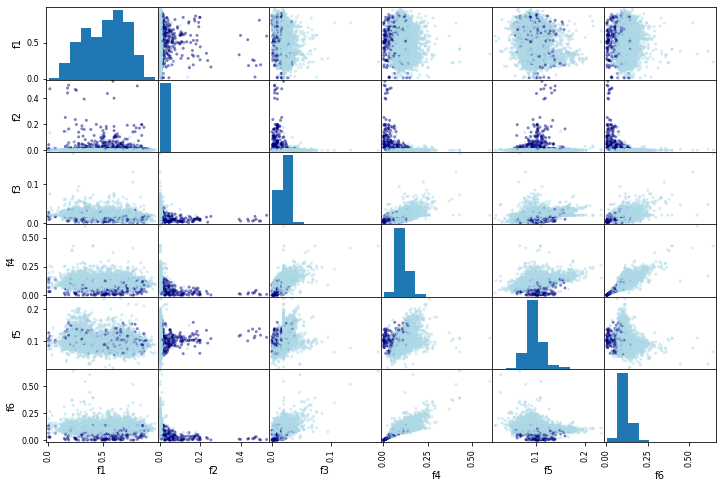

In [5]:
color_code = {'abnormal': 'navy', 'normal': 'lightblue'}

colors = df['result'].apply(lambda x: color_code[x])

pd.plotting.scatter_matrix(df, c=colors, figsize = (12,8))

<font size="+1" color="red">Replace this cell with a brief commentary on whether you already guess any difference between normal and abnormal exams, based on combinations of features. What are the differences you can appreciate?</font>

- **Diagonal** Plots:

> - The diagonal elements of the scatter matrix show the distribution of individual features. Look for differences in the shape and spread of the distributions for normal and abnormal exams. In this case we observe that f1 is the most spread of the examens.

-  **Off-Diagonal** Plots:

> These plots show the relationships between pairs of features.

> **f2**: There is a clear separation between normal and abnormal exams along the f2 axis. This suggests that f2 is effective in distinguishing between the two classes, and you can easily identify different clusters.

> **f4**: Similar to f2, there is a noticeable separation between normal and abnormal exams along the f4 axis. This indicates that f4 is informative in differentiating between the two classes, and there are distinct clusters.

> **f6**: The plot of f6 also shows distinct clusters or separations between normal and abnormal exams. Like f2 and f4, f6 seems to be effective in highlighting differences between the two classes.

On the other hand:

> **f1, f3, f5**:
These features, appear to have less distinct clusters or separations between normal and abnormal exams. This suggests that these features might not be as effective in differentiating between the two classes, and there is more overlap in their distributions.

# 1. Create isolation tree

## 1.1. Random dimension and random split

In [6]:
def pick_random_dimension(df, columns_to_ignore):
    valid_columns = [col for col in df.columns if col not in columns_to_ignore]
    print('Valid Columns :', valid_columns)
    return random.choice(valid_columns)


<font size="+1" color="red">Replace this cell with code implementing "pick_random_dimension" and a couple of calls to this function.</font>

In [7]:
columns_to_ignore = ['result']  # Adjust this list based on your requirements
random_dimension = pick_random_dimension(df, columns_to_ignore)
print("Randomly picked dimension:", random_dimension)

Valid Columns : ['f1', 'f2', 'f3', 'f4', 'f5', 'f6']
Randomly picked dimension: f3


In [8]:
columns_to_ignore = ['result']  # Adjust this list based on your requirements
random_dimension = pick_random_dimension(df, columns_to_ignore)

print("Randomly picked dimension:", random_dimension)

Valid Columns : ['f1', 'f2', 'f3', 'f4', 'f5', 'f6']
Randomly picked dimension: f6


In [9]:
def pick_random_split(df, dimension):
   
    min_value = np.min(df[dimension])
    max_value = np.max(df[dimension])
    
    return random.uniform(min_value, max_value)

In [10]:
dimension_to_split = 'f1'  # Adjust this based on your requirements
random_split_point = pick_random_split(df, dimension_to_split)

print(f"Randomly picked split point for dimension '{dimension_to_split}': {round(random_split_point,2)}")


Randomly picked split point for dimension 'f1': 0.5


<font size="+1" color="red">Replace this cell with code implementing "pick_random_split" and a couple of calls to test this function; each call should return a random split point chosen uniformly at random between the minimum and the maximum value along a dimension.</font>

## 1.2. Implement split data into two

In [11]:
 def split_dataset(df, dimension, split):
    lower_subset = df[df[dimension] <= split]
    upper_subset = df[df[dimension] > split]
    
    return lower_subset, upper_subset
        

<font size="+1" color="red">Replace this cell with code implementing "split_dataset".</font>

<font size="+1" color="red">Replace this cell with code testing "split_dataset", i.e., select a dimension and a cut-off and split the dataset, then print the two pieces and check that it is working correctly.</font>

In [12]:
dimension_to_split = 'f1' 
split_point = 0.5 

lower_subset, upper_subset = split_dataset(df, dimension_to_split, split_point)

print(f"Subset with '{dimension_to_split}' <= {split_point}:\n{lower_subset}")
print(f"\nSubset with '{dimension_to_split}' > {split_point}:\n{upper_subset}")

Subset with 'f1' <= 0.5:
        f1       f2      f3       f4     f5       f6  result
1     0.24  0.00025  0.0300  0.14300  0.133  0.10800  normal
2     0.47  0.00190  0.0240  0.10200  0.131  0.07800  normal
4     0.23  0.00025  0.0260  0.13900  0.090  0.15300  normal
7     0.48  0.00208  0.0200  0.08600  0.078  0.11000  normal
11    0.18  0.00010  0.0230  0.09800  0.085  0.11500  normal
...    ...      ...     ...      ...    ...      ...     ...
7171  0.46  0.00170  0.0201  0.13500  0.104  0.12900  normal
7179  0.33  0.00230  0.0201  0.07700  0.083  0.09300  normal
7180  0.30  0.00170  0.0230  0.08300  0.081  0.10200  normal
7192  0.45  0.00077  0.0201  0.11329  0.096  0.11776  normal
7198  0.35  0.00280  0.0201  0.09000  0.089  0.10100  normal

[3169 rows x 7 columns]

Subset with 'f1' > 0.5:
        f1       f2      f3     f4     f5      f6    result
0     0.73  0.00060  0.0150  0.120  0.082  0.1460    normal
3     0.64  0.00090  0.0170  0.077  0.090  0.0850    normal
5     0.69  0

## 1.3. Create one isolation tree

In [13]:
# LEAVE AS-IS

dfi = df.copy()
dfi.insert(0, 'id', [("P%.4d" % x) for x in range(1, 1 + len(df))])
dfi

,id,f1,f2,f3,f4,f5,f6,result
0,P0001,0.73,0.00060,0.0150,0.120,0.082,0.1460,normal
1,P0002,0.24,0.00025,0.0300,0.143,0.133,0.1080,normal
2,P0003,0.47,0.00190,0.0240,0.102,0.131,0.0780,normal
3,P0004,0.64,0.00090,0.0170,0.077,0.090,0.0850,normal
4,P0005,0.23,0.00025,0.0260,0.139,0.090,0.1530,normal
...,...,...,...,...,...,...,...,...
7195,P7196,0.59,0.00250,0.0208,0.079,0.099,0.0800,normal
7196,P7197,0.51,0.10600,0.0060,0.005,0.089,0.0055,abnormal
7197,P7198,0.51,0.00076,0.0201,0.090,0.067,0.1340,normal
7198,P7199,0.35,0.00280,0.0201,0.090,0.089,0.1010,normal


<font size="+1" color="red">Replace this cell with you code implementing "isolation_tree".</font>

In [14]:
# POSAR COMENTARI
def pick_random_dimension_no_print(df, columns_to_ignore):
    valid_columns = [col for col in df.columns if col not in columns_to_ignore]
    return random.choice(valid_columns)

In [15]:
def isolation_tree(data, columns_to_ignore, min_items):
    tree = {}
    
    # If the data has min_items or fewer, create a leaf node
    if len(data) <= min_items:
        return {"contents": data}
    else:
        dimension = pick_random_dimension_no_print(data, columns_to_ignore)
        split = pick_random_split(data, dimension)
        (left_data,right_data) = split_dataset(data, dimension, split)
        
        left = isolation_tree(left_data, columns_to_ignore, min_items)
        right = isolation_tree(right_data, columns_to_ignore, min_items)
        
        tree = {"left": left,
                "right": right,
                "dimension": dimension,
                "split": split} 
        
        
        return tree



In [16]:
# LEAVE AS-IS

mytree = isolation_tree(dfi, ['id','result'], 2000)

In [17]:
# LEAVE AS-IS

class tree_drawing(object):
    def __init__(self, value, left=None, right=None):
        self.value = value
        self.left = left
        self.right = right

    def __str__(self, label='', level=0):
        ret = "-" * level + label + ":" + repr(self.value)+"\n"
        if self.left:
            ret += self.left.__str__("<", level+1)
        if self.right:
            ret += self.right.__str__(">", level+1)
        return ret

    def __repr__(self):
        return self.value
    
def tree_to_nodes(tree):
    if 'contents' in tree:
        data = tree['contents']
        normal_count = len(data[data['result'] == 'normal'])
        abnormal_count = len(data[data['result'] == 'abnormal'])
        description = "external node: %d normal + %d abnormal" % (normal_count, abnormal_count)
        return tree_drawing(description)
    else:
        left = tree['left']
        right = tree['right']
        description = 'internal node: ' + tree['dimension'] + ' <= ' + ("%.2f" % tree['split'])
        n = tree_drawing(description, tree_to_nodes(left), tree_to_nodes(right) )
        return n

In [18]:
print(tree_to_nodes(mytree))

:'internal node: f2 <= 0.03'
-<:'internal node: f5 <= 0.11'
--<:'internal node: f2 <= 0.01'
---<:'internal node: f2 <= 0.01'
----<:'internal node: f1 <= 0.61'
-----<:'internal node: f4 <= 0.53'
------<:'internal node: f5 <= 0.08'
-------<:'external node: 424 normal + 7 abnormal'
------->:'internal node: f1 <= 0.37'
--------<:'external node: 1215 normal + 27 abnormal'
-------->:'external node: 1834 normal + 61 abnormal'
------>:'external node: 1 normal + 0 abnormal'
----->:'internal node: f5 <= 0.04'
------<:'external node: 2 normal + 0 abnormal'
------>:'internal node: f5 <= 0.05'
-------<:'external node: 5 normal + 0 abnormal'
------->:'internal node: f4 <= 0.13'
--------<:'external node: 1759 normal + 82 abnormal'
-------->:'external node: 458 normal + 5 abnormal'
---->:'external node: 23 normal + 68 abnormal'
--->:'external node: 31 normal + 97 abnormal'
-->:'external node: 895 normal + 57 abnormal'
->:'external node: 19 normal + 130 abnormal'



<font size="+1" color="red">Replace this cell with you code implementing `get_max_tree_depth`</font>

In [19]:
def get_max_tree_depth(tree):

    if not tree or "contents" in tree:
        return 0
        
    left_depth = get_max_tree_depth(tree.get("left", {}))
    right_depth = get_max_tree_depth(tree.get("right", {}))
    
    return 1 + max(left_depth, right_depth)

<font size="+1" color="red">Replace this cell with you code testing `get_max_tree_depth` on `mytree`.</font>

In [20]:
get_max_tree_depth(mytree)

8

# 2. Create isolation forests and find depth of items

An isolation forest will be simply a an array of isolation trees.

<font size="-1" color="gray">(Remove this cell when delivering.)</font>

## 2.1. Create an isolation forest

<font size="+1" color="red">Replace this cell with you code implementing "isolation_tree".</font>

In [21]:
def isolation_forest(dfi, columns_to_ignore, min_items, num_trees):
    trees = []
    for i in range(num_trees):
        mytree = isolation_tree(dfi, columns_to_ignore, min_items)
        trees.append(mytree)
        
    return trees

In [22]:
min_items = 50
num_trees = 20

In [23]:
# LEAVE AS-IS

myforest = isolation_forest(dfi, ['id', 'result'], min_items, num_trees)
print("The forest has %d trees" % len(myforest))

The forest has 20 trees


In [24]:
# Leave this code as-is

for i in range(0, 2):
    print("Tree number %d" % i)
    print(tree_to_nodes(myforest[i]))
    print()

Tree number 0
:'internal node: f1 <= 0.72'
-<:'internal node: f3 <= 0.10'
--<:'internal node: f3 <= 0.07'
---<:'internal node: f2 <= 0.24'
----<:'internal node: f1 <= 0.43'
-----<:'internal node: f4 <= 0.02'
------<:'external node: 3 normal + 14 abnormal'
------>:'internal node: f4 <= 0.14'
-------<:'internal node: f6 <= 0.37'
--------<:'internal node: f6 <= 0.12'
---------<:'internal node: f5 <= 0.06'
----------<:'external node: 7 normal + 1 abnormal'
---------->:'internal node: f5 <= 0.08'
-----------<:'internal node: f3 <= 0.02'
------------<:'internal node: f2 <= 0.13'
-------------<:'internal node: f3 <= 0.00'
--------------<:'external node: 1 normal + 0 abnormal'
-------------->:'internal node: f3 <= 0.02'
---------------<:'external node: 38 normal + 1 abnormal'
--------------->:'internal node: f6 <= 0.06'
----------------<:'external node: 1 normal + 0 abnormal'
---------------->:'internal node: f4 <= 0.09'
-----------------<:'internal node: f4 <= 0.07'
------------------<:'exter

## 2.2. Find the average depth of an item

In [25]:
# LEAVE AS-IS

def find_element_depth_aux(tree, column_name, column_value, depth):
    
    if 'contents' in tree:
        # We are in a leaf node
        
        data = tree['contents']
        matching = data[data[column_name] == column_value]
        if len(matching) == 0:
            return None
        elif len(matching) > 1:
            print("Error: multiple elements match your search criterion")
            return None
        else:
            return depth
    else:
        # We are in an internal node
        
        in_left = find_element_depth_aux(tree['left'], column_name, column_value, depth+1)
        if in_left == None:
            in_right = find_element_depth_aux(tree['right'], column_name, column_value, depth+1)
            return in_right
        else:
            return in_left
        
def find_element_depth(tree, column_name, column_value):
    return find_element_depth_aux(tree, column_name, column_value, 0)

In [26]:
# LEAVE AS-IS

def print_sample_depths(df, sample_size, tested_tree):

    for result in ['normal', 'abnormal']:
        print("Depths for %s items" % result)

        sample = list(df[df['result'] == result]['id'].sample(sample_size))

        max_depth = get_max_tree_depth(tested_tree)
        for random_id in sample:
            print("- id=%s is at depth %d/%d" % (random_id, find_element_depth(tested_tree, "id", random_id), max_depth))
            
    
print("On shallow tree, having maximum depth %d" % get_max_tree_depth(mytree))
print_sample_depths(dfi, 5, mytree)
print()

print("On first tree of forest, having maximum depth %d" % get_max_tree_depth(myforest[0]))
print_sample_depths(dfi, 5, myforest[0])
print()


On shallow tree, having maximum depth 8
Depths for normal items
- id=P6920 is at depth 8/8
- id=P1221 is at depth 8/8
- id=P6618 is at depth 8/8
- id=P3349 is at depth 8/8
- id=P6700 is at depth 7/8
Depths for abnormal items
- id=P5320 is at depth 8/8
- id=P6159 is at depth 1/8
- id=P5877 is at depth 4/8
- id=P2939 is at depth 2/8
- id=P6284 is at depth 8/8

On first tree of forest, having maximum depth 41
Depths for normal items
- id=P1587 is at depth 12/41
- id=P4554 is at depth 31/41
- id=P6464 is at depth 24/41
- id=P6556 is at depth 22/41
- id=P6232 is at depth 13/41
Depths for abnormal items
- id=P7008 is at depth 14/41
- id=P7118 is at depth 18/41
- id=P0687 is at depth 13/41
- id=P0778 is at depth 21/41
- id=P3800 is at depth 21/41



<font size="+1" color="red">Replace this cell with a brief commentary on these depths.</font>

> In the shallow tree, both normal and abnormal items have a consistent maximum depth. The abnormal items, however, exhibit variability in depths.

> The first tree of the forest is deeper, suggesting a more complex decision structure. Normal and abnormal items show a wider range of depths, indicating a more intricate decision-making process. Analyzing the distribution of depths across trees can provide insights into the model's behavior.

<font size="+1" color="red">Replace this cell with you code implementing "find_average_depth".</font>

In [27]:
def find_average_depth(forest, column_name, value):
    total_depth = 0
    matching_elements = 0

    for tree in forest:
        depth = find_element_depth(tree, column_name, value)
        if depth != None:
            total_depth += depth
            matching_elements += 1

    if matching_elements == 0:
        return None  

    average_depth = total_depth / matching_elements
    return average_depth

In [28]:
# LEAVE AS-IS

for result in ['normal', 'abnormal']:
    print("Average depths for %s items" % result)
    
    sample = list(dfi[dfi['result'] == result]['id'].sample(5))
    
    for random_id in sample:
        print("- id=%s is at average depth %.1f" % (random_id, find_average_depth(myforest, "id", random_id)))
    
    print()

Average depths for normal items
- id=P2958 is at average depth 39.5
- id=P3902 is at average depth 23.1
- id=P0723 is at average depth 15.2
- id=P3156 is at average depth 18.5
- id=P1378 is at average depth 18.8

Average depths for abnormal items
- id=P1406 is at average depth 20.4
- id=P2005 is at average depth 18.9
- id=P2922 is at average depth 19.2
- id=P5276 is at average depth 16.5
- id=P3380 is at average depth 18.1



<font size="+1" color="red">Replace this cell with a brief commentary indicating how would you make the "find_average_depth" function more efficient if you wanted to obtain the average depth of **all** elements. Be concise but be precise, providing pseudocode if you consider it clearer than a text explanation.</font>

To make the find_average_depth function more efficient for obtaining the average depth of all elements, we can optimize it by **avoiding redundant depth calculations**. We could do it like this:

```python
def find_average_depth(forest, column_name, values):
    total_depth = 0
    matching_elements = 0

    depth_cache = {}  # Cache to store calculated depths

    for tree in forest:
        for value in values:
            # Check if depth is already calculated
            if value not in depth_cache:
                depth = find_element_depth(tree, column_name, value)
                depth_cache[value] = depth

            depth = depth_cache[value]

            if depth is not None:
                total_depth += depth
                matching_elements += 1

    if matching_elements == 0:
        return None

    average_depth = total_depth / matching_elements
    return average_depth

```
This pseudocode introduces a **depth_cache**  to store the depths calculated for each element. The function first checks if the depth for a particular element is already calculated before invoking find_element_depth. If the depth is already in the cache, it retrieves the value from there, avoiding redundant calculations. This optimization reduces the number of calls to find_element_depth, making the function more efficient when calculating average depths for all elements.

# 3. Find the average depth of a sample of normal and abnormal points

## 3.1. Determine average depths

In [33]:
# LEAVE AS-IS

abnormal_point_ids = list(dfi[dfi['result'] == 'abnormal']['id'].sample(30))
normal_point_ids = list(dfi[dfi['result'] == 'normal']['id'].sample(30))

print("Normal point sample ids   : %s" % normal_point_ids)
print("Abnormal point sample ids : %s" % abnormal_point_ids)

Normal point sample ids   : ['P6104', 'P2519', 'P5392', 'P5653', 'P2631', 'P3412', 'P2572', 'P3887', 'P4287', 'P1392', 'P1330', 'P0714', 'P4975', 'P2545', 'P4176', 'P3610', 'P2534', 'P0231', 'P7066', 'P4619', 'P4772', 'P5295', 'P1054', 'P5615', 'P6401', 'P1345', 'P4243', 'P2815', 'P3553', 'P6202']
Abnormal point sample ids : ['P3729', 'P4874', 'P6742', 'P4179', 'P5164', 'P3552', 'P5074', 'P6655', 'P1356', 'P2456', 'P1524', 'P6295', 'P2668', 'P5458', 'P4954', 'P6231', 'P4696', 'P0733', 'P3920', 'P1834', 'P5472', 'P3595', 'P6478', 'P2147', 'P5407', 'P5172', 'P3564', 'P0117', 'P0908', 'P7182']


In [34]:
# LEAVE AS-IS

normal_depths = []
print("Depths of items in the 'normal' sample:")
for i in normal_point_ids:
    depth = find_average_depth(myforest, 'id', i)
    normal_depths.append(depth)
    print(" element id=%s is at average depth %.2f" % (i, depth))
print()

Depths of items in the 'normal' sample:
 element id=P6104 is at average depth 24.50
 element id=P2519 is at average depth 20.70
 element id=P5392 is at average depth 20.85
 element id=P5653 is at average depth 19.65
 element id=P2631 is at average depth 12.75
 element id=P3412 is at average depth 22.85
 element id=P2572 is at average depth 18.20
 element id=P3887 is at average depth 16.95
 element id=P4287 is at average depth 19.60
 element id=P1392 is at average depth 17.10
 element id=P1330 is at average depth 21.00
 element id=P0714 is at average depth 39.55
 element id=P4975 is at average depth 12.55
 element id=P2545 is at average depth 20.15
 element id=P4176 is at average depth 17.55
 element id=P3610 is at average depth 21.75
 element id=P2534 is at average depth 20.80
 element id=P0231 is at average depth 20.35
 element id=P7066 is at average depth 27.40
 element id=P4619 is at average depth 19.50
 element id=P4772 is at average depth 18.35
 element id=P5295 is at average dept

In [35]:
# LEAVE AS-IS

abnormal_depths = []
print("Depths of items in the 'abnormal' sample:")
for i in abnormal_point_ids:
    depth = find_average_depth(myforest, 'id', i)
    abnormal_depths.append(depth)
    print(" element id=%s is at average depth %.2f" % (i, depth))
print()

Depths of items in the 'abnormal' sample:
 element id=P3729 is at average depth 18.80
 element id=P4874 is at average depth 14.70
 element id=P6742 is at average depth 15.70
 element id=P4179 is at average depth 15.35
 element id=P5164 is at average depth 16.65
 element id=P3552 is at average depth 15.20
 element id=P5074 is at average depth 16.55
 element id=P6655 is at average depth 12.15
 element id=P1356 is at average depth 20.55
 element id=P2456 is at average depth 19.10
 element id=P1524 is at average depth 16.50
 element id=P6295 is at average depth 18.70
 element id=P2668 is at average depth 18.65
 element id=P5458 is at average depth 16.70
 element id=P4954 is at average depth 18.55
 element id=P6231 is at average depth 12.00
 element id=P4696 is at average depth 18.05
 element id=P0733 is at average depth 16.50
 element id=P3920 is at average depth 13.40
 element id=P1834 is at average depth 17.20
 element id=P5472 is at average depth 18.85
 element id=P3595 is at average de

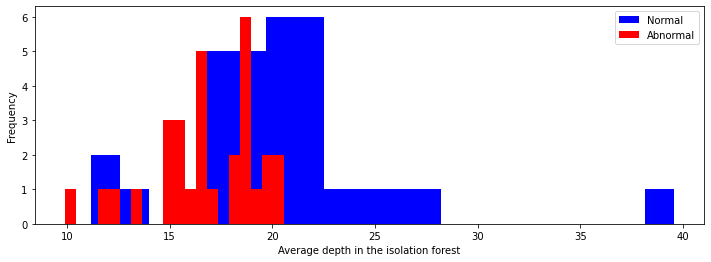

In [36]:
# LEAVE AS-IS

plt.figure(figsize=(12,4))
plt.hist(normal_depths, label='Normal', bins=20, density=False, color='blue')
plt.hist(abnormal_depths, label='Abnormal', bins=20, density=False, color='red')
plt.xlabel('Average depth in the isolation forest')
plt.ylabel('Frequency')
plt.legend()
plt.show()

<font size="+1" color="red">Replace this cell with a brief commentary of what you see in this histogram.</font>

- We can see that the **red**, abnormal distribution seems to be a little more extensive and the depth values are around 16, but we do not observe a very clear average because there are quite a few different values.
- On the other hand, the **blue**, normal distribution, we can observe a much clearer mean around depth 21-22, the mean is more pronounced, but we can also observe some atypical observations with depth somewhat greater than the mean, around the 30.

We have to keep in mind that each time we run the program the histogram will be different but the dynamics are the same, two normal distributions, where the blue one normally has larger values

## 3.2. Compute outlier scores and conclude

In [37]:
# LEAVE AS-IS

# Source: https://stackoverflow.com/a/27683292/1235784

from numpy import euler_gamma
from scipy.special import digamma
def harmonic(s):
    return digamma(s + 1) + euler_gamma

In [38]:
# LEAVE AS-IS

def outlier_score_factory():
    n = len(df.index)
    c_n = 2.0 * harmonic(n - 1.0) - (2.0 * (n-1)/n)
    return lambda d: 2.0**(-d/c_n)

outlier_score = outlier_score_factory()

normal_scores = [outlier_score(d) for d in normal_depths]
abnormal_scores = [outlier_score(d) for d in abnormal_depths]

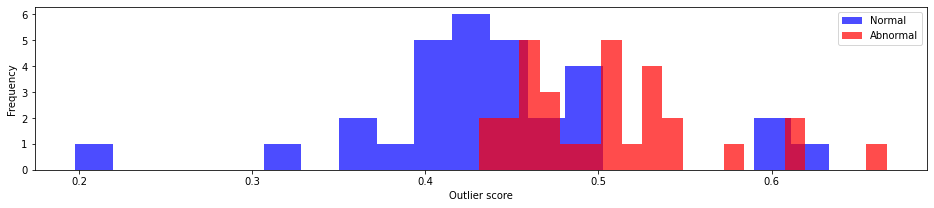

In [39]:
# LEAVE AS-IS

plt.figure(figsize=(16,3))

# Plot the two histograms; the parameter 'alpha' is the transparency of the bar
plt.hist(normal_scores, label='Normal', bins=20, density=False, color='blue', alpha=0.7)
plt.hist(abnormal_scores, label='Abnormal', bins=20, density=False, color='red', alpha=0.7)

# Draw the axis labels, legend, and display
plt.xlabel('Outlier score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

<font size="+1" color="red">Replace this cell with a brief commentary of what you see in this histogram.</font>

**Normal** Distribution:

> The blue histogram represents normal items, and it appears to follow a distribution with two peaks or modes.
The distribution suggests that there are two groups of normal items with distinct outlier scores. The lower peak indicates a subgroup with relatively lower outlier scores.

**Abnormal** Distribution:

> The red histogram corresponds to abnormal items and appears to have a single peak.
The higher outlier scores in the red histogram suggest that abnormal items, on average, have higher outlier scores compared to normal items.

**Overlap**:

> There is some overlap between the two distributions, meaning that there are abnormal items with outlier scores that may resemble those of normal items. This overlap can pose a challenge in accurately distinguishing between normal and abnormal cases based on outlier scores alone.

**Interpretation:**

> The outlier scores are likely indicative of how "outlying" or unusual each item is within the dataset. Abnormal items tend to have higher outlier scores, indicating their distinctiveness or abnormality in comparison to normal items.

<font size="+1" color="red">Replace this cell with your code to determine an optimal threshold.</font>

In [40]:
from sklearn.metrics import precision_score, recall_score, f1_score


In [41]:
def find_optimal_threshold(normal_scores, abnormal_scores):
    
    all_scores = normal_scores + abnormal_scores
    left = min(all_scores)
    right = max(all_scores)
    best_threshold = None
    best_f1_score = 0.0

    # Binary search for optimal threshold
    while left <= right:
        threshold = (left + right) / 2

        predicted_labels = [1 if score > threshold else 0 for score in all_scores]

        # Calculate precision, recall, and F1 score using sklearn.metrics functions
        precision = precision_score([0] * len(normal_scores) + [1] * len(abnormal_scores), predicted_labels)
        recall = recall_score([0] * len(normal_scores) + [1] * len(abnormal_scores), predicted_labels)
        f1 = f1_score([0] * len(normal_scores) + [1] * len(abnormal_scores), predicted_labels)

        if f1 > best_f1_score:
            best_f1_score = f1
            best_threshold = threshold

        if sum(predicted_labels) > len(abnormal_scores):
            right = threshold - 1
        else:
            left = threshold + 1

    return best_threshold

<font size="+1" color="red">Replace this cell with your evaluation of the optimal threshold.</font>

In [45]:
threshold = find_optimal_threshold(normal_scores, abnormal_scores)
print('Optimal threshold -->', round(threshold,3))

Optimal threshold --> 0.432


In [46]:
from sklearn.metrics import confusion_matrix

# Apply the optimal threshold to all scores
predicted_labels = [1 if score > threshold else 0 for score in (normal_scores + abnormal_scores)]

true_labels = [0] * len(normal_scores) + [1] * len(abnormal_scores)

# Calculate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)
tn, fp, fn, tp = conf_matrix.ravel()

# Calculate false positive -- false negative 
fpr = fp / (fp + tn)
fnr = fn / (fn + tp)

# Print the results
print(f"False Positive Rate (FPR): {fpr:.3f}")
print(f"False Negative Rate (FNR): {fnr:.3f}")

False Positive Rate (FPR): 0.500
False Negative Rate (FNR): 0.033


**Threshold: 0.432**
>**False Positive Rate** (FPR): 0.500: This means that when the threshold is set at 0.432, there is a 50% probability of incorrectly classifying a normal exam as abnormal. In other words, one out of every two normal cases is predicted as abnormal.

>**False Negative Rate** (FNR): 0.033: With this threshold, there is a very low 3.3% probability of incorrectly classifying an abnormal exam as normal. This indicates that the model is relatively good at identifying abnormal cases, as only a small fraction of them are missed.

In summary, adjusting the threshold to 0.432 results in a trade-off between false positives and false negatives. While the false positive rate is relatively high, the false negative rate is low, suggesting a bias towards classifying cases as abnormal. Depending on the application and the consequences of false positives and false negatives, this threshold may be suitable or might need further adjustment.

I repeat that for once again that each time we run the program the result will be different, my explanation is for a specific case but if we run it more than once we can see that the trend is the same and if we look at the histogram above We can see that the threshold divides the two distributions very well, so what we are doing makes sense.






### Extra points

In [43]:
def find_element_depth_fast(tree, column_name, column_values, depth=0):
    if 'contents' in tree:
        # We are in a leaf node
        matching = tree['contents'][tree['contents'][column_name].isin(column_values)]
        if len(matching) == 0:
            return None
        elif len(matching) > 1:
            return None
        else:
            return depth
    else:
        # We are in an internal node
        in_left = find_element_depth_fast(tree['left'], column_name, column_values, depth + 1)
        in_right = find_element_depth_fast(tree['right'], column_name, column_values, depth + 1)
        return in_left if in_left is not None else in_right

def find_average_depth_fast(forest, column_name, column_values):
    total_depth = 0
    matching_elements = 0

    for tree in forest:
        depth = find_element_depth_fast(tree, column_name, column_values)
        if depth is not None:
            total_depth += depth
            matching_elements += 1

    if matching_elements == 0:
        return None  

    average_depth = total_depth / matching_elements
    return average_depth


Average depth for normal cases (f1): 10.45
Average depth for abnormal cases (f1): 12.05

Average depth for normal cases (f2): 11.75
Average depth for abnormal cases (f2): 12.05

Average depth for normal cases (f3): 10.45
Average depth for abnormal cases (f3): 11.75

Average depth for normal cases (f4): 11.1
Average depth for abnormal cases (f4): 10.75

Average depth for normal cases (f5): 10.45
Average depth for abnormal cases (f5): 11.4

Average depth for normal cases (f6): 11.3
Average depth for abnormal cases (f6): 11.85



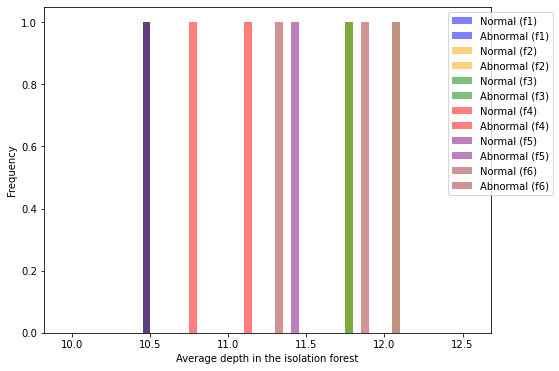

In [56]:
# Define the columns to loop through
columns_to_loop = ['f1', 'f2', 'f3', 'f4', 'f5', 'f6']

for column in columns_to_loop:
    # Calculate average depths using the fast method
    normal_depth = find_average_depth_fast(myforest, column, df[df['result'] == 'normal'][column])
    abnormal_depth = find_average_depth_fast(myforest, column, df[df['result'] == 'abnormal'][column])

    # Print the calculated average depths
    print(f"Average depth for normal cases ({column}):", normal_depth)
    print(f"Average depth for abnormal cases ({column}):", abnormal_depth)
    print()

# Plot histograms for all columns
plt.figure(figsize=(8, 6))

# Define colors for each column
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown']

for column, color in zip(columns_to_loop, colors):
    # Calculate normal and abnormal depths for the entire dataset
    all_normal_depths = find_average_depth_fast(myforest, column, df[df['result'] == 'normal'][column])
    all_abnormal_depths = find_average_depth_fast(myforest, column, df[df['result'] == 'abnormal'][column])

    # Plot histograms for each column
    plt.hist(all_normal_depths, label=f'Normal ({column})', bins=20, density=False, alpha=0.5, color=color)
    plt.hist(all_abnormal_depths, label=f'Abnormal ({column})', bins=20, density=False, alpha=0.5, color=color)

plt.xlabel('Average depth in the isolation forest')
plt.ylabel('Frequency')

# Adjust the legend position
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))

plt.show()


<font size="+2" color="#003300">I hereby declare that, except for the code provided by the course instructors, all of my code, report, and figures were produced by myself.</font>